In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [3]:
# Reading prepared data into a dataframe.
df = pd.read_csv("FinalData.csv").set_index("DATE")
df.head()

,CSUSHPISA,Year,Month,GDP,UNRATE,FEDFUNDS,Cons_Price_Index,Consumer_price_index,House,working_people,old_people,Subsidy,Median_Income,Total_Houses,POP_PERCENT
DATE,,,,,,,,,,,,,,,
2001-07-01,122.887,2002,7,46936.000000,5.8,1.73,144.7,181.2,4.2,1.838880e+08,12.287458,24.183,65820.0,109297.0,79.409
2001-08-01,123.830,2002,8,46918.333333,5.7,1.74,145.1,181.7,4.0,1.841610e+08,12.287458,24.183,65820.0,109297.0,79.409
2001-09-01,124.779,2002,9,46900.666667,5.7,1.75,145.4,181.5,3.9,1.844232e+08,12.287458,24.183,65820.0,109297.0,79.409
2001-10-01,125.734,2002,10,46883.000000,5.7,1.75,145.0,181.4,4.0,1.845542e+08,12.287458,24.183,65820.0,109297.0,79.409
2001-11-01,126.669,2002,11,46931.000000,5.9,1.34,144.6,181.2,4.0,1.847447e+08,12.287458,24.183,65820.0,109297.0,79.409


In [4]:
# Dropping year and month columns
df.drop(columns = ["Year", "Month"], inplace = True)

In [5]:
# Correlation analysis
df.corr()

,CSUSHPISA,GDP,UNRATE,FEDFUNDS,Cons_Price_Index,Consumer_price_index,House,working_people,old_people,Subsidy,Median_Income,Total_Houses,POP_PERCENT
CSUSHPISA,1.000000,0.883919,-0.433798,0.120000,0.816784,0.809057,-0.044120,0.579770,0.798692,0.777069,0.889405,0.703255,0.744955
GDP,0.883919,1.000000,-0.391058,-0.127540,0.913883,0.949943,-0.084345,0.848136,0.930646,0.896654,0.832998,0.922858,0.931268
UNRATE,-0.433798,-0.391058,1.000000,-0.528179,-0.115345,-0.151166,0.152381,-0.029547,-0.183055,-0.015179,-0.452150,-0.141063,-0.118994
FEDFUNDS,0.120000,-0.127540,-0.528179,1.000000,-0.339557,-0.333261,0.197677,-0.407219,-0.377159,-0.404955,0.075295,-0.396328,-0.404487
Cons_Price_Index,0.816784,0.913883,-0.115345,-0.339557,1.000000,0.938663,0.027792,0.838723,0.904469,0.925525,0.683706,0.893023,0.916574
Consumer_price_index,0.809057,0.949943,-0.151166,-0.333261,0.938663,1.000000,-0.021564,0.918639,0.974915,0.973469,0.796747,0.974530,0.988877
House,-0.044120,-0.084345,0.152381,0.197677,0.027792,-0.021564,1.000000,0.056777,-0.204549,-0.054395,-0.133612,-0.089258,-0.096292
working_people,0.579770,0.848136,-0.029547,-0.407219,0.838723,0.918639,0.056777,1.000000,0.856285,0.880628,0.557492,0.964588,0.942762
old_people,0.798692,0.930646,-0.183055,-0.377159,0.904469,0.974915,-0.204549,0.856285,1.000000,0.960206,0.825677,0.956426,0.978234
Subsidy,0.777069,0.896654,-0.015179,-0.404955,0.925525,0.973469,-0.054395,0.880628,0.960206,1.000000,0.762022,0.942676,0.968487


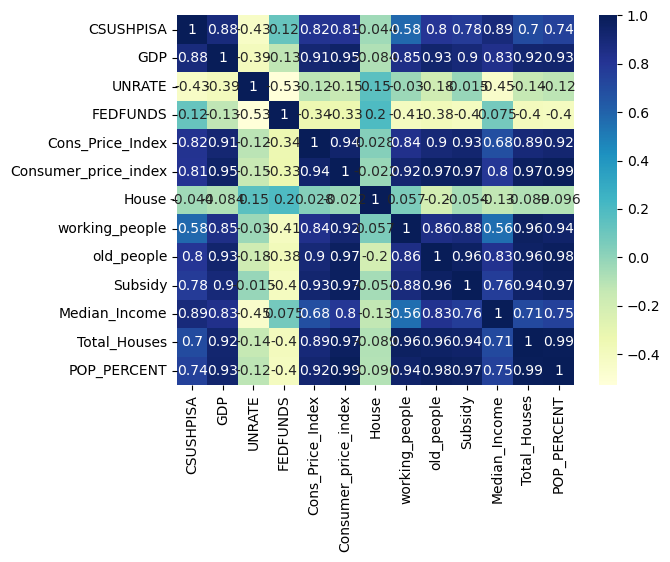

In [7]:
import seaborn as sns
    
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [8]:
# Separating the target variable and the independent variable
y = df.pop("CSUSHPISA")
X = df

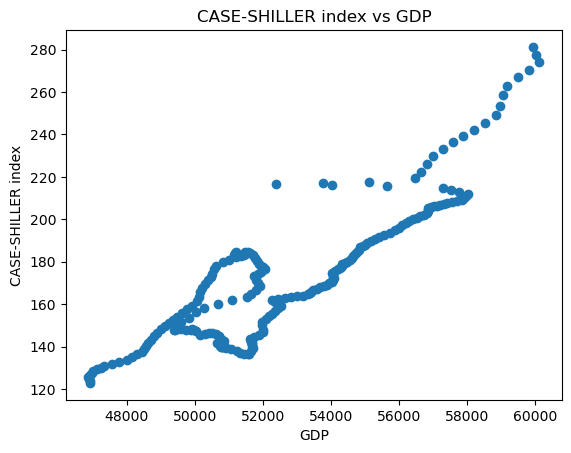

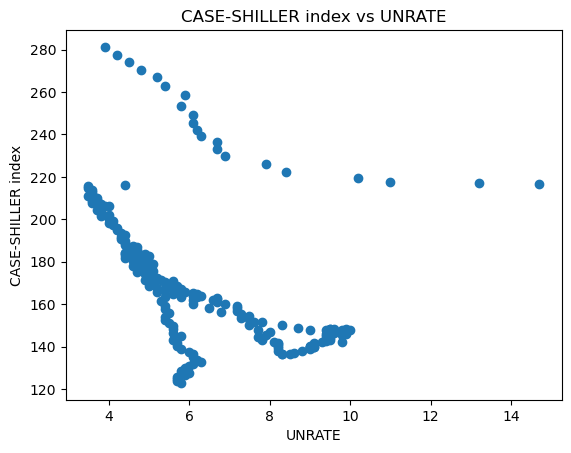

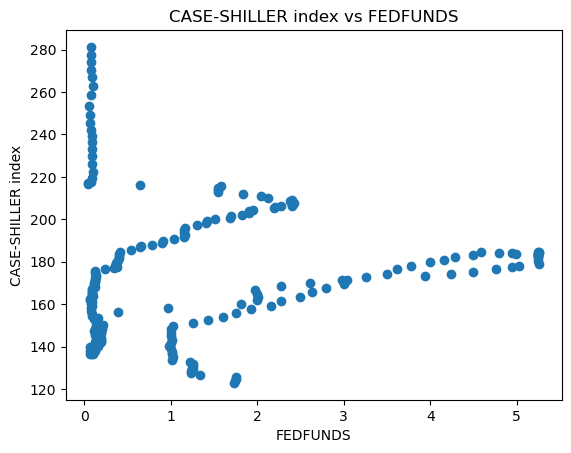

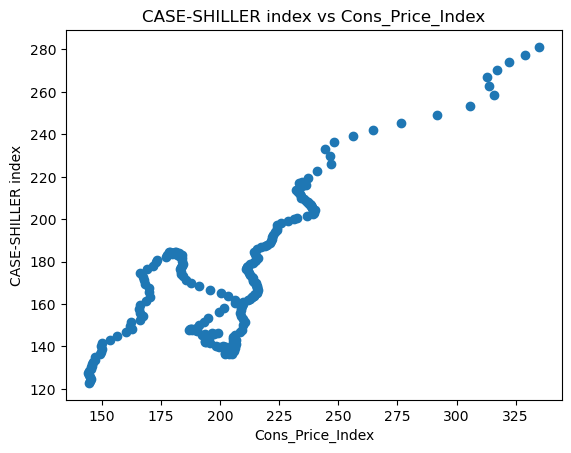

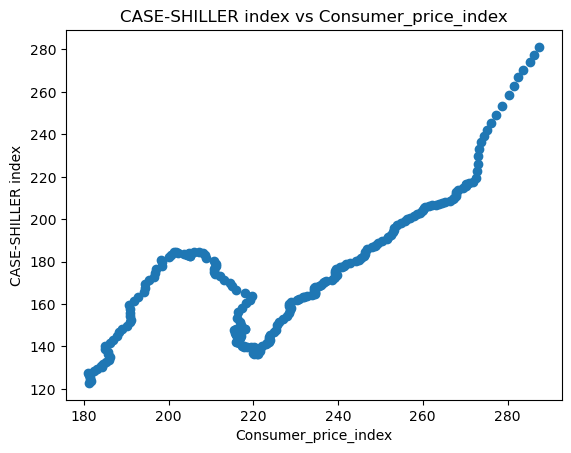

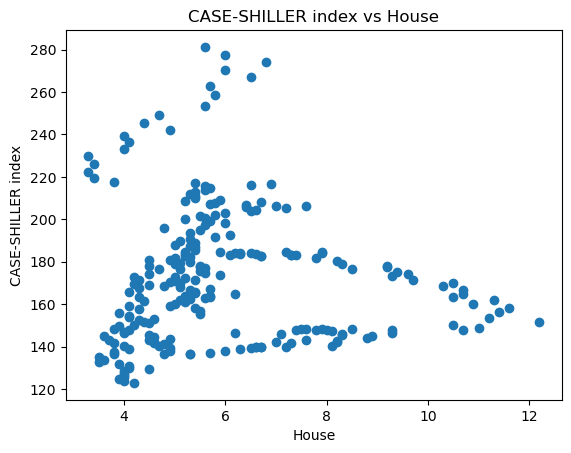

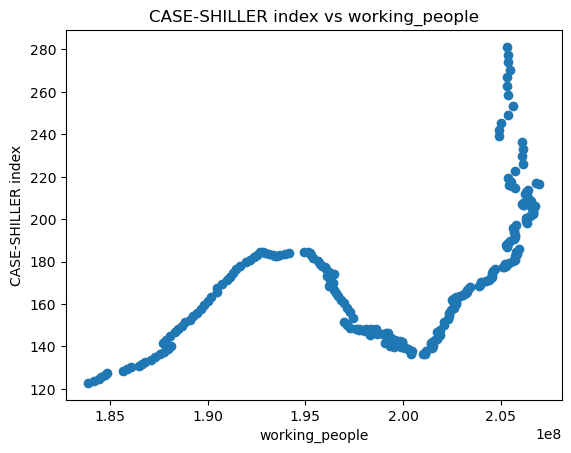

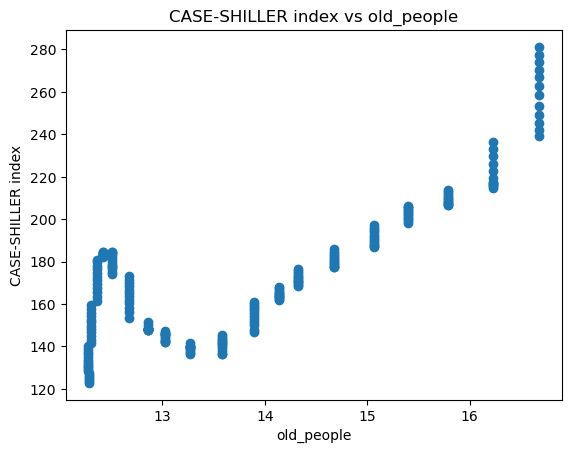

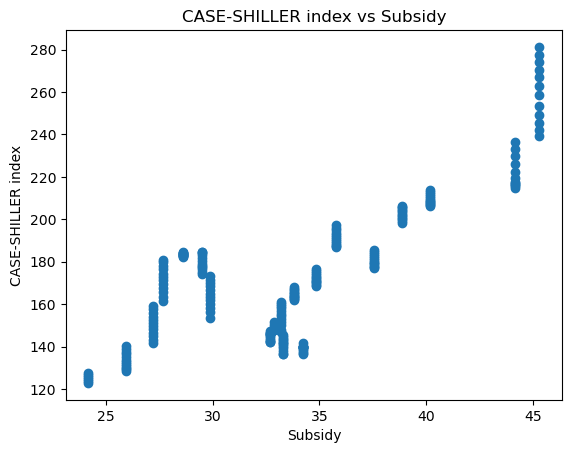

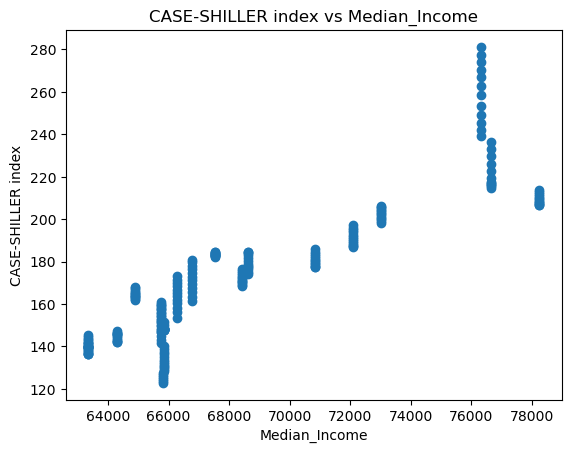

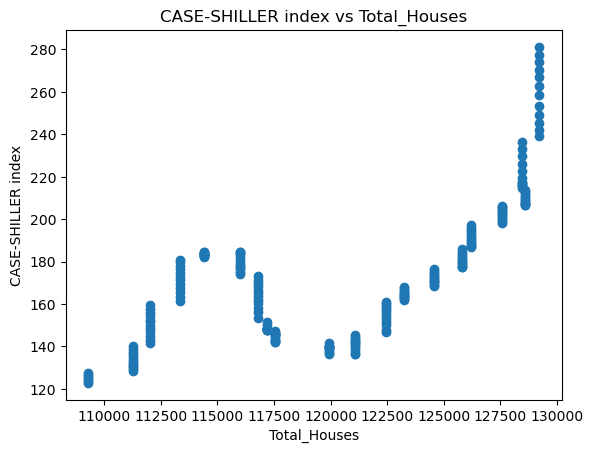

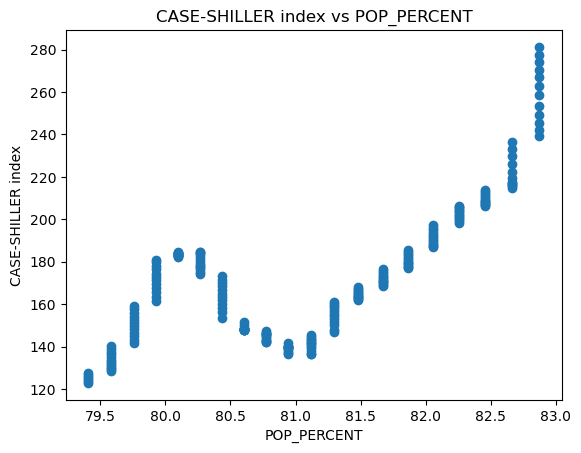

In [9]:
# Plotting scatter plots of the CASE-SHILLER index vs features

for feature in X.columns:
    plt.figure()
    plt.scatter(x = X[feature], y = y)
    plt.xlabel(feature)
    plt.ylabel("CASE-SHILLER index")
    plt.title(f"CASE-SHILLER index vs {feature}")

Based on the information provided by the correlation matrix and scatter plots, we can draw the following conclusions:

1. There is a negative correlation between the unemployment rate and home prices, which is in line with expectations. As unemployment rates rise, home prices tend to decrease.

2. The number of new houses constructed shows nearly no correlation with home prices. This result is somewhat unexpected since one might assume that an increase in the supply of new houses would affect home prices. It's possible that the quantity of newly built houses is insufficient to substantially influence prices.

3. The impact of the great recession is evident in almost all the plots, indicating a significant influence on the housing market during that period.

4. Interest rates appear to have a slightly negative impact on home prices, suggesting that as interest rates rise, home prices tend to decline.

5. All other variables show a positive correlation with home prices. This implies that as these variables increase, such as GDP, they are associated with higher home prices.

In summary, the analysis reveals various relationships between different factors and home prices, including expected negative correlations like unemployment rates and interest rates, as well as unexpected findings like the limited impact of new housing supply on prices. Additionally, the impact of the great recession is evident throughout the data.

In [10]:
#From the correlation matrix above, it can be seen that several pairs of independent variables have high correlation. Let's drop one column from each such pair as they will cause multicollinearity. We will drop the column which has lower correlation with the target.

# Dropping multicollinearity columns
mult_cols =['working_people','Consumer_price_index',"POP_PERCENT","Total_Houses","Subsidy",'old_people','Cons_Price_Index','Median_Income']
df.drop(columns = mult_cols, inplace = True)
X = df

In [11]:
# Data Scaling 
scalar = MinMaxScaler()
X = scalar.fit_transform(X)

In [17]:
## Making the model
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 42)


In [18]:
from sklearn.model_selection import cross_val_score

In [19]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regression': SVR(),
    'Neural Network': MLPRegressor()
}

results = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse_scores = -scores
    avg_mse = mse_scores.mean()
    results[model_name] = avg_mse


best_model = min(results, key=results.get)
best_model_instance = models[best_model]


best_model_instance.fit(X_train, y_train)


predictions = best_model_instance.predict(X_test)
mse = mean_squared_error(y_test, predictions)


print("Model Selection Results:")
for model, mse_score in results.items():
    print(f"{model}: MSE={mse_score}")

print(f"\nBest Model: {best_model}")
print(f"Best Model MSE on Testing Set: {mse}")

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptro

Model Selection Results:
Linear Regression: MSE=166.95016104212405
Decision Tree: MSE=61.49753436827878
Random Forest: MSE=51.03590231890124
Support Vector Regression: MSE=454.0364551299326
Neural Network: MSE=27089.042473556132

Best Model: Random Forest
Best Model MSE on Testing Set: 26.17059408775346


In [20]:
r2 = r2_score(y_test, predictions)

print("R-squared score:", r2)

R-squared score: 0.9789227194511982


##The r2 score is close to 1. It means that the model predicts the target variable with good accuracy.

In [27]:
# Get feature importances
feature_importances = best_model_instance.feature_importances_
cols = df.columns

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': cols, 'Importance': feature_importances})

# Sort the DataFrame by importance (descending)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(importance_df)

    Feature  Importance
0       GDP    0.714925
1    UNRATE    0.194103
2  FEDFUNDS    0.078711
3     House    0.012261


"GDP" is the most important feature with an importance score of approximately 0.715. This means that the "GDP" feature has the highest impact on the predictions made by your model.

"UNRATE" is the second most important feature with an importance score of approximately 0.194.

"FEDFUNDS" is the third most important feature with an importance score of approximately 0.079.

"House" is the least important feature with an importance score of approximately 0.012.

These importance scores give you insights into the relative importance of each feature in your RandomForestRegressor model. Features with higher importance scores are more influential in making predictions, while features with lower scores have less impact on the model's predictions. This information can be useful for feature selection and understanding which variables are driving the model's predictions.





